# Analisis Exploratorio de Datos (EDA)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_excel('bd_integrantes_Esp.xlsx', sheet_name = None)

In [20]:
df_1 = df['integrantes']
df_2 = df['departamentos']

In [21]:
df_1.head()

,Nombre de los miembros,ID,Salario-Cargo,Fecha Nacimiento,Edad,Sexo,Fecha de contratación,Fecha salida,Status do Integrante,Departamento,Reclutamiento de fuentes,Registro de desempeño,Índice de satisfacción
0,Isis,A1304055947,5060-Técnico de Producción I,1982-05-21,38,F,2015-09-01,NaN,Ativo,dpt1,Página Web compañía,Arriba,5.0
1,Emanuel,A1109029366,3520-Técnico de Producción I,1975-12-21,45,M,2015-02-03,NaN,Ativo,dpt1,Recomendación empleados,Dentro de lo esperado,3.0
2,Vinícius,A1501072124,4400-Técnico de Producción I,1972-04-17,49,M,2017-07-06,NaN,Ativo,dpt1,Sitio web de empleo,Abajo de lo esperado,2.0
3,João Guilherme,A1302053339,3960-Técnico de Producción I,1994-10-17,26,M,2018-11-04,NaN,Ativo,dpt1,Sitio web de empleo,Abajo de lo esperado,4.0
4,Luna,A1204032927,3520-Técnico de Producción I,1985-08-04,35,F,2017-09-28,NaN,Ativo,dpt1,Feria de contratación,Arriba,4.0


In [22]:
df_2.head()

,cod_departamento,Departamento,Gerente
0,dpt1,Producción,Robson R.
1,dpt2,Ventas,Julia S.
2,dpt3,Administrativo,Ana C.
3,dpt4,TI,Vinicius R.


## Proceso de ETL para preparar las tablas

In [23]:
# verificamos valores nulos
df_1.isnull().sum()

Nombre de los miembros        0
ID                            0
Salario-Cargo                 0
Fecha Nacimiento              0
Edad                          0
Sexo                          0
Fecha de contratación         0
Fecha salida                207
Status do Integrante          0
Departamento                  0
Reclutamiento de fuentes      0
Registro de desempeño         0
Índice de satisfacción        0
dtype: int64

In [24]:
# Verificamos los valores unicos de la columna Status do Integrante y de Registro de Desempeño
Status = df_1['Status do Integrante'].unique()
Status


array(['Ativo'], dtype=object)

In [25]:
Desempeño = df_1['Registro de desempeño'].unique()
Desempeño

array(['Arriba', 'Dentro de lo esperado', 'Abajo de lo esperado'],
      dtype=object)

In [26]:
df_1.shape

(207, 13)

In [27]:
# Eliminamos Columna con valores nulos e irrelevantes
df_1 = df_1.drop(columns=['Fecha salida', 'Status do Integrante'])

# Dividimos en 2 la columna
df_1[['Salario', 'Cargo']] = df_1['Salario-Cargo'].str.split('-', expand=True)
df_1 = df_1.drop(columns=['Salario-Cargo'])

# Normalizamos valor de Registro de Desempeño
df_1['Registro de desempeño'] = df_1['Registro de desempeño'].replace('Arriba', 'Arriba de lo esperado')

df_1.head()

,Nombre de los miembros,ID,Fecha Nacimiento,Edad,Sexo,Fecha de contratación,Departamento,Reclutamiento de fuentes,Registro de desempeño,Índice de satisfacción,Salario,Cargo
0,Isis,A1304055947,1982-05-21,38,F,2015-09-01,dpt1,Página Web compañía,Arriba de lo esperado,5.0,5060,Técnico de Producción I
1,Emanuel,A1109029366,1975-12-21,45,M,2015-02-03,dpt1,Recomendación empleados,Dentro de lo esperado,3.0,3520,Técnico de Producción I
2,Vinícius,A1501072124,1972-04-17,49,M,2017-07-06,dpt1,Sitio web de empleo,Abajo de lo esperado,2.0,4400,Técnico de Producción I
3,João Guilherme,A1302053339,1994-10-17,26,M,2018-11-04,dpt1,Sitio web de empleo,Abajo de lo esperado,4.0,3960,Técnico de Producción I
4,Luna,A1204032927,1985-08-04,35,F,2017-09-28,dpt1,Feria de contratación,Arriba de lo esperado,4.0,3520,Técnico de Producción I


## EDA

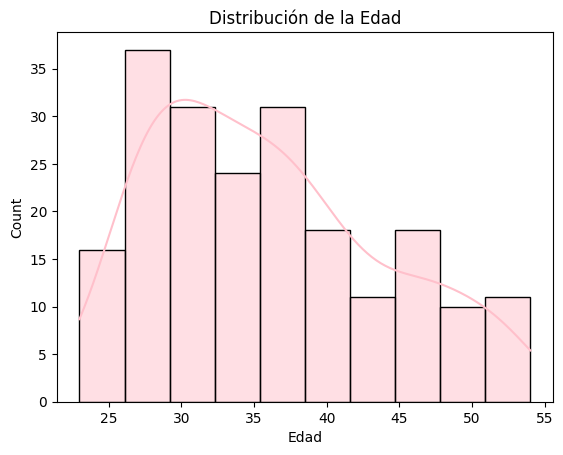

In [31]:
# Vemos la distribución por edad
sns.histplot(df_1['Edad'], bins=10, kde=True, color= 'pink')
plt.title('Distribución de la Edad')
plt.show()


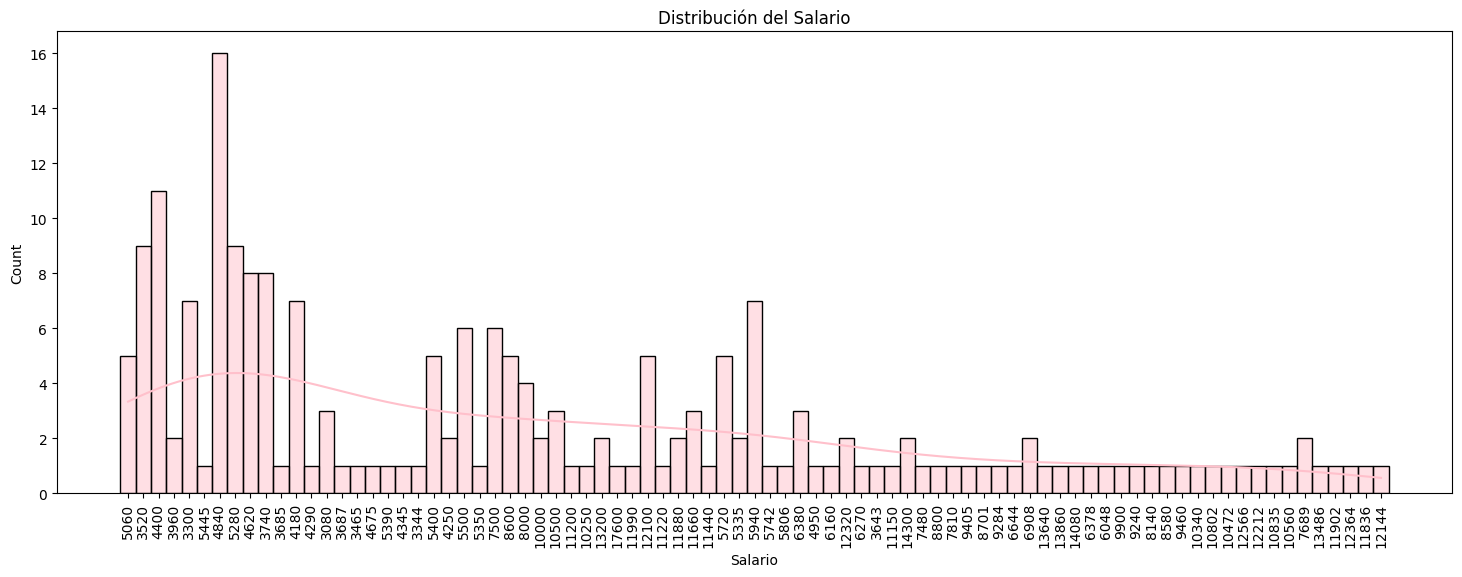

In [44]:
# Vemos la distribucion de Salario

plt.figure(figsize=(18, 6))
sns.histplot(df_1['Salario'], bins=15, kde=True, color='pink')
plt.title('Distribución del Salario')
plt.xticks(rotation=90)
plt.show()

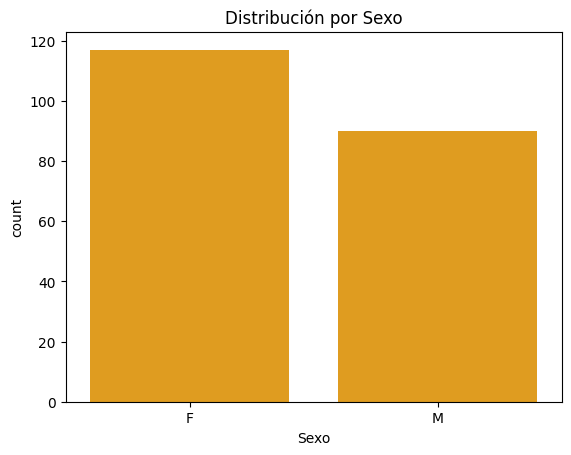

In [48]:
# Conteo por genero
sns.countplot(x='Sexo', data=df_1, color='orange')
plt.title('Distribución por Sexo')
plt.show()

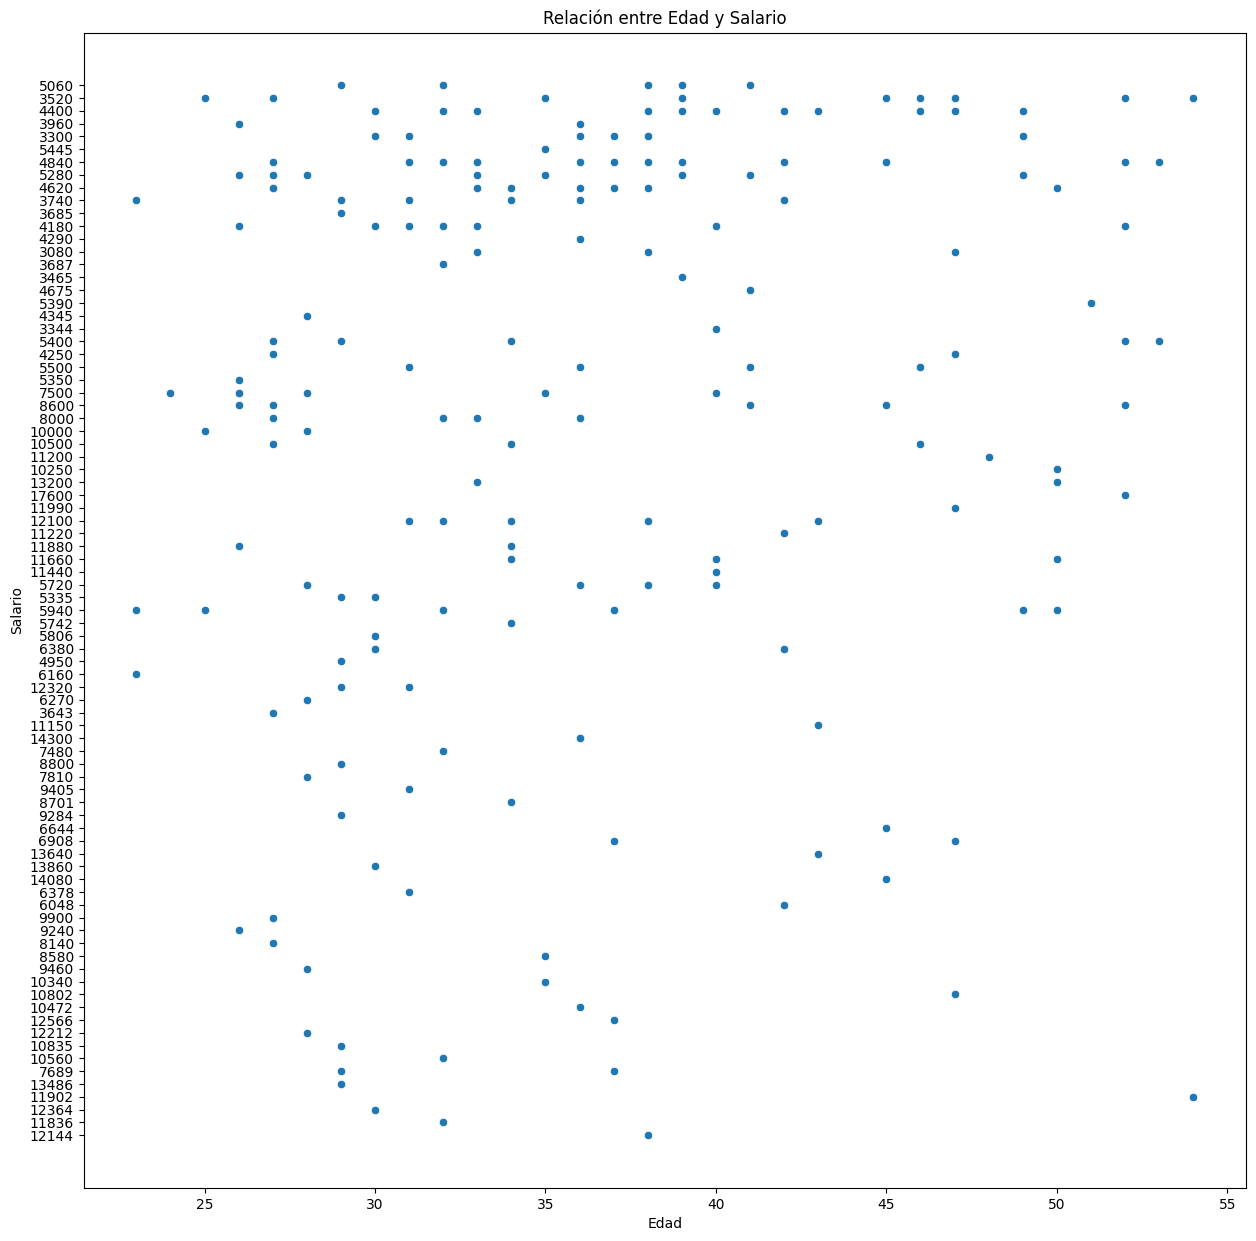

In [55]:
# Vemos relación entre Edad y Salario
plt.figure(figsize=(15, 15))
sns.scatterplot(x='Edad', y='Salario', data=df_1)
plt.title('Relación entre Edad y Salario')
plt.show()

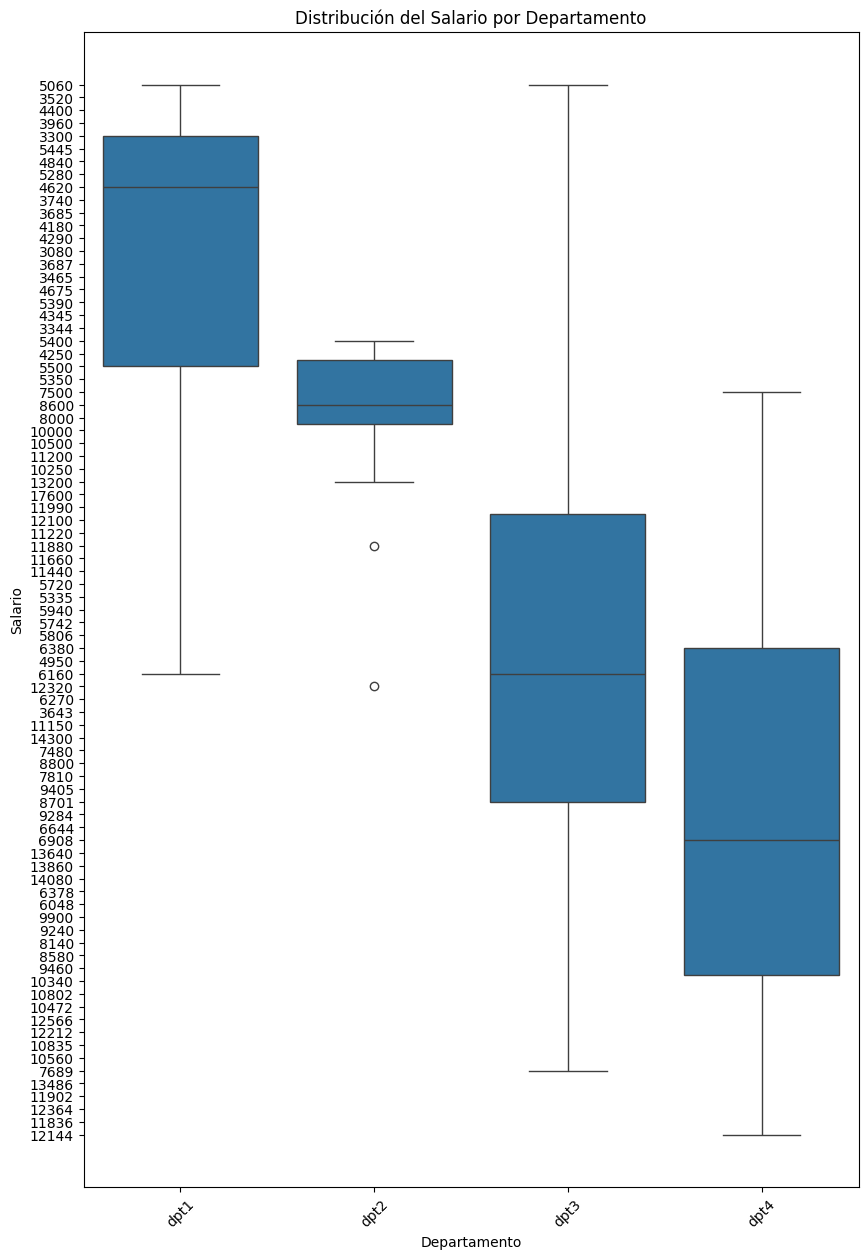

In [58]:
plt.figure(figsize=(10, 15))
sns.boxplot(x='Departamento', y='Salario', data=df_1)
plt.title('Distribución del Salario por Departamento')
plt.xticks(rotation=45)
plt.show()

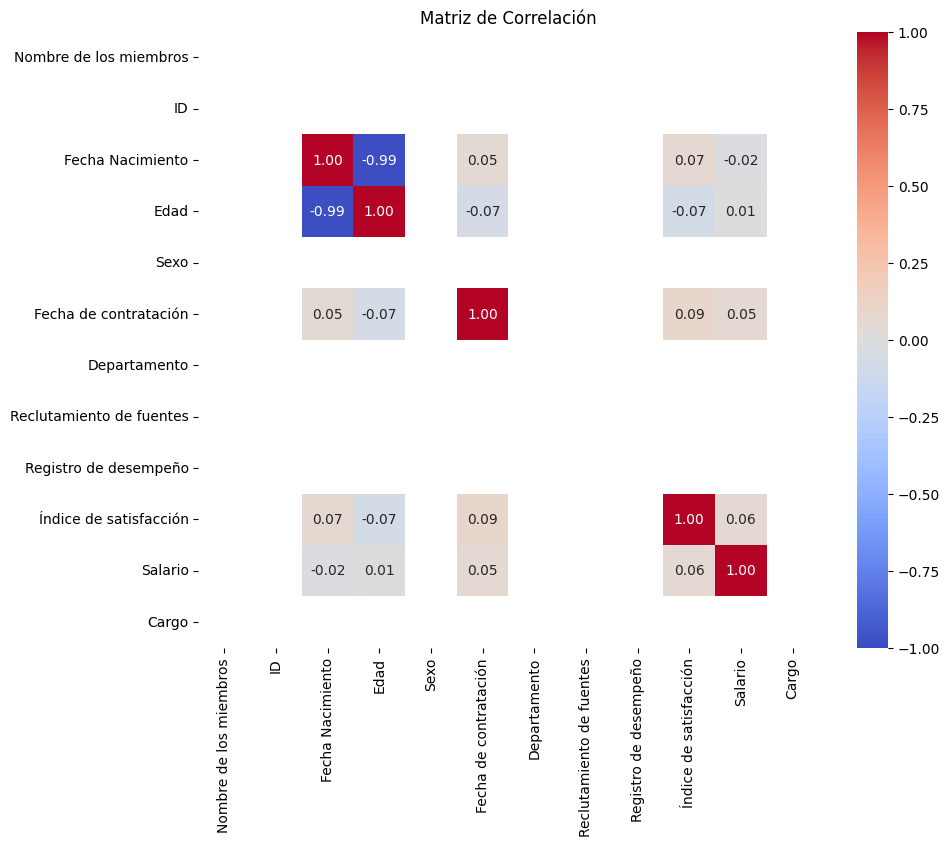

In [64]:
# Vemos relaciones con un mapa de calor
df_numerico = df_1.select_dtypes(include='number')

corr_matrix = df_numerico.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [70]:
# Guardamos los DataFrames en un excel
with pd.ExcelWriter('bd_limpio.xlsx') as writer:
    # Guarda el primer DataFrame en la primera hoja
    df_1.to_excel(writer, sheet_name='integrantes', index=False)
    
    # Guarda el segundo DataFrame en la segunda hoja
    df_numerico.to_excel(writer, sheet_name='departamentos', index=False)